<a href="https://colab.research.google.com/github/HubNin/Entrega/blob/main/EGC/Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import pandas as pd
df_train = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTiCSR9l0tA6oCwszNdVA0zpLzOnLJ4uQ2KUS4DrCUjlwvMOqrsT9toGoqL7Bor54M6E0STf4soRVRK/pub?gid=246399989&single=true&output=csv')
df_test = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTwKLAAqFzivxJ_8pLPr2ed0U77fUYaDMGdrGpdLpXeY-mjp_4r7gPUI01aoMkebnlci2oNHnkhIfJY/pub?gid=444091158&single=true&output=csv')

In [6]:
# Pandas a arreglos numpy
datos_train = df_train.values
datos_test = df_test.values

# Etiquetas
cat_train = datos_train[:,0]
cat_test = datos_test[:,0]

# Subdivisión por categorías
x_train_1 = datos_train[cat_train==1,1:]
x_train_2 = datos_train[cat_train==2,1:]
x_train_3 = datos_train[cat_train==3,1:]
x_train_4 = datos_train[cat_train==4,1:]
x_train_5 = datos_train[cat_train==5,1:]

x_test_1 = datos_test[cat_test==1,1:]
x_test_2 = datos_test[cat_test==2,1:]
x_test_3 = datos_test[cat_test==3,1:]
x_test_4 = datos_test[cat_test==4,1:]
x_test_5 = datos_test[cat_test==5,1:]

In [8]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

x_train_1_s = min_max_scaler.fit_transform(x_train_1)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(x_train_1), np.max(x_train_1)))
print('Mínimo y máximo normalización: {:.1f}, {:.1f}'.format(np.min(x_train_1_s), np.max(x_train_1_s)))

x_test_1_s = min_max_scaler.transform(x_test_1)
x_test_2_s = min_max_scaler.transform(x_test_2)
x_test_3_s = min_max_scaler.transform(x_test_3)
x_test_4_s = min_max_scaler.transform(x_test_4)
x_test_5_s = min_max_scaler.transform(x_test_5)

Mínimo y máximo originales: -7.1, 5.0
Mínimo y máximo normalización: 0.0, 1.0


In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
np.random.seed(23)

dim_entrada = x_train_1_s.shape[1]    #140 muestras/ejemplo
entrada = Input(shape=(dim_entrada,))

# Encoder
encoder = Dense(32, activation='relu')(entrada)
encoder = Dense(16, activation='relu')(encoder)
encoder = Dense(8, activation='relu')(encoder)

# Decoder
decoder = Dense(16, activation='relu')(encoder)
decoder = Dense(32, activation='relu')(decoder)
decoder = Dense(140, activation='sigmoid')(decoder)

# Autoencoder = entrada + decoder (que ya contiene el encoder)
autoencoder = Model(inputs=entrada, outputs=decoder)

autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 140)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           4,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 140)                 │           4,620 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,484 (40.95 KB)

 Trainable params: 10,484 (40.95 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
autoencoder.compile(optimizer='adam', loss='mae')
historia = autoencoder.fit(x_train_1_s, x_train_1_s,
          epochs=20,
          batch_size=512,
          validation_data=(x_test_1_s, x_test_1_s),
          shuffle=True)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1273 - val_loss: 0.1244
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1229 - val_loss: 0.1161
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1125 - val_loss: 0.1025
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0992 - val_loss: 0.0896
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0870 - val_loss: 0.0789
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0772 - val_loss: 0.0722
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0709 - val_loss: 0.0685
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0681 - val_loss: 0.0666
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0655 - val_loss: 0.0656
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0655 - val_loss: 0.0651
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0644 - val_loss: 0.0646
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0645 - val_loss: 0.0639
Epoch 13/20


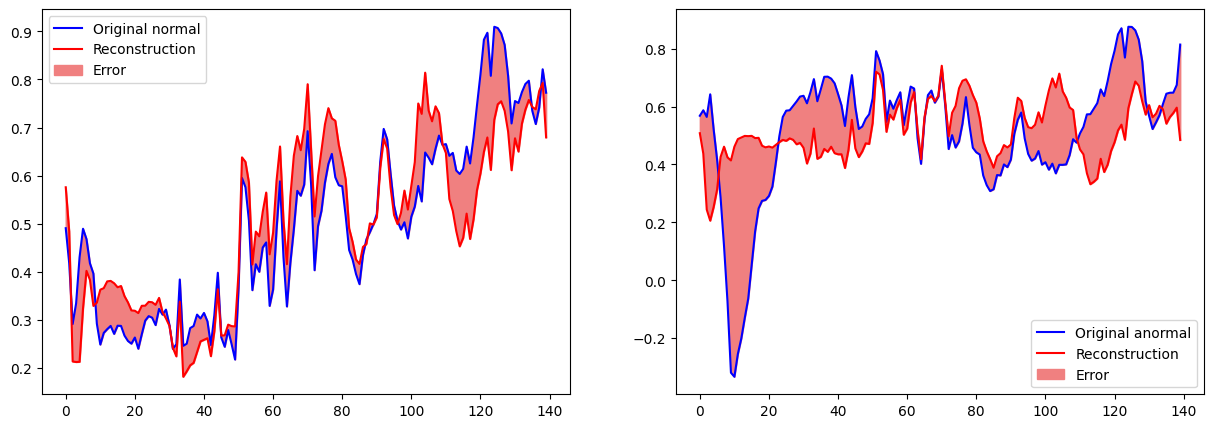

In [12]:
# ¿Qué tan bien reconstruye un dato "normal" y uno anormal?
rec_normal = autoencoder(x_test_1_s).numpy()
rec_anormal = autoencoder(x_test_5_s).numpy()

dato = 5
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(x_test_1_s[dato],'b')
plt.plot(rec_normal[dato],'r')
plt.fill_between(np.arange(140), rec_normal[dato], x_test_1_s[dato], color='lightcoral')
plt.legend(labels=["Original normal", "Reconstruction", "Error"])
plt.subplot(1,2,2)
plt.plot(x_test_5_s[dato],'b')
plt.plot(rec_anormal[dato],'r')
plt.fill_between(np.arange(140), rec_anormal[dato], x_test_5_s[dato], color='lightcoral')
plt.legend(labels=["Original anormal", "Reconstruction", "Error"])

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


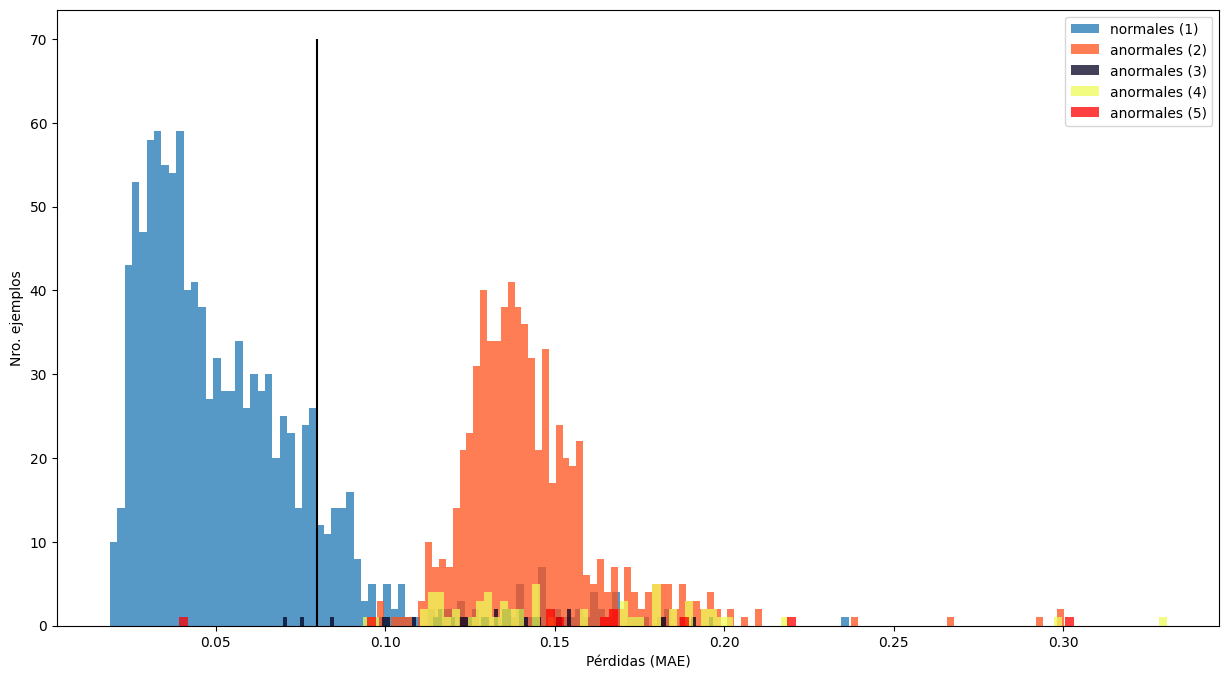

In [13]:
# Distribuciones de los errores de construcción
# para cada categoría

import tensorflow as tf

rec_1 = autoencoder.predict(x_test_1_s)
rec_2 = autoencoder.predict(x_test_2_s)
rec_3 = autoencoder.predict(x_test_3_s)
rec_4 = autoencoder.predict(x_test_4_s)
rec_5 = autoencoder.predict(x_test_5_s)

loss_1 = tf.keras.losses.mae(rec_1, x_test_1_s)
loss_2 = tf.keras.losses.mae(rec_2, x_test_2_s)
loss_3 = tf.keras.losses.mae(rec_3, x_test_3_s)
loss_4 = tf.keras.losses.mae(rec_4, x_test_4_s)
loss_5 = tf.keras.losses.mae(rec_5, x_test_5_s)


plt.figure(figsize=(15,8))
plt.hist(loss_1[None,:], bins=100, alpha=0.75, label='normales (1)')
plt.hist(loss_2[None,:], bins=100, alpha=0.75, color='#ff521b', label='anormales (2)')
plt.hist(loss_3[None,:], bins=100, alpha=0.75, color='#020122', label='anormales (3)')
plt.hist(loss_4[None,:], bins=100, alpha=0.75, color='#eefc57', label='anormales (4)')
plt.hist(loss_5[None,:], bins=100, alpha=0.75, color='r', label='anormales (5)')
plt.xlabel('Pérdidas (MAE)')
plt.ylabel('Nro. ejemplos')
plt.legend(loc='upper right')
plt.vlines(0.08,0,70,'k')

In [14]:
umbral = np.mean(loss_1) + np.std(loss_1)
print("Umbral: ", umbral)

Umbral:  0.08420979273081167


In [18]:
from twilio.rest import Client

account_sid = 'AC266f40b53fac6a3186ac1384d4b10a52'
auth_token = '5fb31815d6181255db250fe77ab69025'
client = Client(account_sid, auth_token)

def enviar_alerta(mensaje):
  message = client.messages.create(
      from_='whatsapp:+14155238886',
      body=mensaje,
      to='whatsapp:+51936051282'
  )
  print(message.sid)

def predecir(modelo, datos, umbral):
  reconstrucciones = modelo(datos)
  perdida = tf.keras.losses.mae(reconstrucciones, datos)
  return tf.math.less(perdida, umbral)

def calcular_sensitividad(prediccion, titulo):
  TP = np.count_nonzero(~prediccion)
  FN = np.count_nonzero(prediccion)
  sen = 100*(TP/(TP+FN))

  print(titulo + ': {:.1f}%'.format(sen))
  return sen

def calcular_especificidad(prediccion, titulo):
  TN = np.count_nonzero(prediccion)
  FP = np.count_nonzero(~prediccion)
  esp = 100*(TN/(TN+FP))

  print(titulo + ': {:.1f}%'.format(esp))
  return esp


# Predicciones
pred_1 = predecir(autoencoder, x_test_1_s, umbral)
pred_2 = predecir(autoencoder, x_test_2_s, umbral)
pred_3 = predecir(autoencoder, x_test_3_s, umbral)
pred_4 = predecir(autoencoder, x_test_4_s, umbral)
pred_5 = predecir(autoencoder, x_test_5_s, umbral)

# Pred1: especificidad
esp_1 = calcular_especificidad(pred_1,'Especificidad (cat. 1, normales)')

# Pred 2 a 5: sensitividad
sen_2 = calcular_sensitividad(pred_2,'Sensitividad (cat. 2, anormales)')
sen_3 = calcular_sensitividad(pred_3,'Sensitividad (cat. 3, anormales)')
sen_4 = calcular_sensitividad(pred_4,'Sensitividad (cat. 4, anormales)')
sen_5 = calcular_sensitividad(pred_3,'Sensitividad (cat. 5, anormales)')

# Simular detección de anomalía (reemplaza con tu lógica real)
anomalia1= esp_1 < 88.7
anomalia2= sen_2 < 99.9
anomalia3= sen_3 < 93.9
anomalia4= sen_4 < 98.4
anomalia5= sen_5 < 93.9

if anomalia1:
    mensaje = "Se ha detectado una anomalía en la señal ECG."
    enviar_alerta(mensaje)

if anomalia2:
    mensaje = "Se ha detectado una anomalía en la señal ECG."
    enviar_alerta(mensaje)

if anomalia3:
    mensaje = "Se ha detectado una anomalía en la señal ECG."
    enviar_alerta(mensaje)

if anomalia4:
    mensaje = "Se ha detectado una anomalía en la señal ECG."
    enviar_alerta(mensaje)

if anomalia5:
    mensaje = "Se ha detectado una anomalía en la señal ECG."
    enviar_alerta(mensaje)

Especificidad (cat. 1, normales): 88.7%
Sensitividad (cat. 2, anormales): 100.0%
Sensitividad (cat. 3, anormales): 93.9%
Sensitividad (cat. 4, anormales): 100.0%
Sensitividad (cat. 5, anormales): 93.9%
SMae627b440ec6ad2c1e37d9080000725d


# Dibujar un dato normal y uno de cada anormal
import matplotlib.pyplot as plt
import numpy as np

ind = 10
normal = x_train_1[ind]
anormal_2 = x_train_2[ind]
anormal_3 = x_train_3[ind]
anormal_4 = x_train_4[ind]
anormal_5 = x_train_5[ind]

plt.figure(figsize=(10,8))
plt.grid()
plt.subplot(2,2,1)
plt.plot(np.arange(140), normal)
plt.plot(np.arange(140), anormal_2, 'r--')
plt.subplot(2,2,2)
plt.plot(np.arange(140), normal)
plt.plot(np.arange(140), anormal_3, 'r--')
plt.subplot(2,2,3)
plt.plot(np.arange(140), normal)
plt.plot(np.arange(140), anormal_4, 'r--')
plt.subplot(2,2,4)
plt.plot(np.arange(140), normal)
plt.plot(np.arange(140), anormal_5, 'r--')